In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [25]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [26]:
data.reset_index(inplace=True)

In [27]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03 00:00:00+00:00,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.354963,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.131853,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.447884,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14 00:00:00+00:00,94.968758,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15 00:00:00+00:00,90.873482,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16 00:00:00+00:00,90.534698,90.860001,91.750000,90.010002,91.199997,48485500


In [28]:
ma_100_days = data.Close.rolling(100).mean()

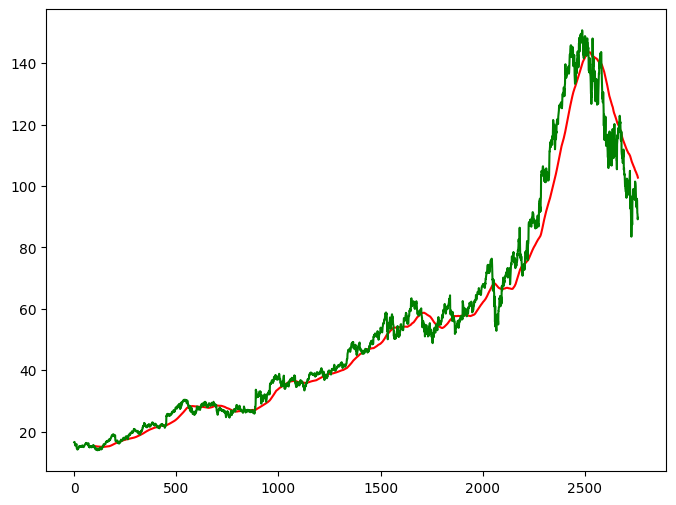

In [29]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [30]:
ma_200_days = data.Close.rolling(200).mean()

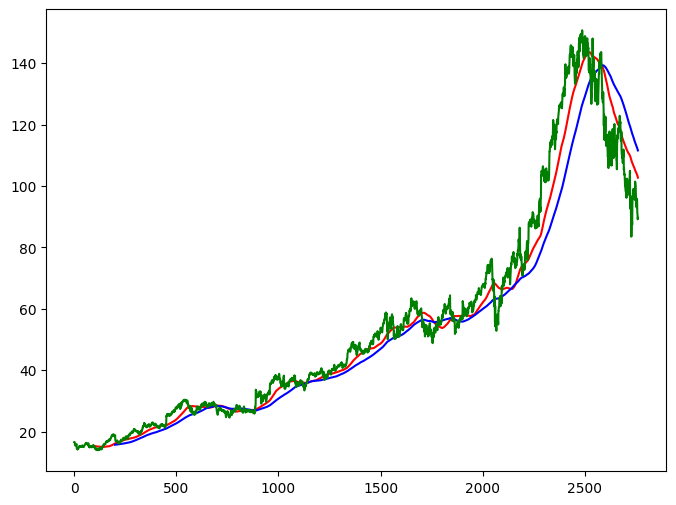

In [31]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [32]:
data.dropna(inplace=True)

In [33]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [34]:
data_train.shape[0]

2208

In [35]:
data_test.shape[0]

553

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
data_train_scale = scaler.fit_transform(data_train)

In [38]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [39]:
x, y = np.array(x), np.array(y)

In [40]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [43]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 [==============================] - 15s 181ms/step - loss: 0.0297
Epoch 2/50
66/66 [==============================] - 12s 175ms/step - loss: 0.0062
Epoch 3/50
66/66 [==============================] - 12s 179ms/step - loss: 0.0061
Epoch 4/50
66/66 [==============================] - 11s 171ms/step - loss: 0.0054
Epoch 5/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0053
Epoch 6/50
66/66 [==============================] - 12s 181ms/step - loss: 0.0042
Epoch 7/50
66/66 [==============================] - 11s 173ms/step - loss: 0.0049
Epoch 8/50
66/66 [==============================] - 11s 173ms/step - loss: 0.0042
Epoch 9/50
66/66 [==============================] - 11s 174ms/step - loss: 0.0038
Epoch 10/50
66/66 [==============================] - 14s 219ms/step - loss: 0.0036
Epoch 11/50
66/66 [==============================] - 15s 231ms/step - loss: 0.0043
Epoch 12/50
66/66 [==============================] - 13s 203ms/step - loss: 0.0034
Epoch 13/50
6

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [45]:
pas_100_days = data_train.tail(100)

In [46]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [47]:
data_test_scale  =  scaler.fit_transform(data_test)

In [48]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [49]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 44ms/step


In [50]:
scale =1/scaler.scale_

In [51]:
y_predict = y_predict*scale

In [52]:
y = y*scale

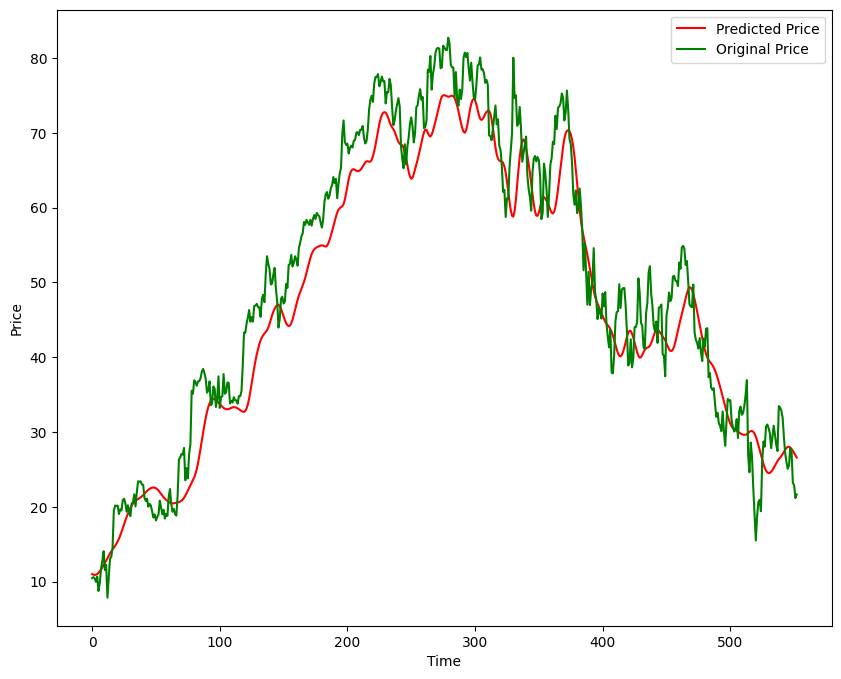

In [53]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
model.save('Stock Predictions Model.keras')